# Applied DBSCAN

### Find DBSCAN EPS parameter
We need to know roughly the size of EPS to try

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

**EPS**: "epsilon" value in sklearn is the maximum distance between two samples for one to be considered as in the neighborhood of the other.

At least a first value to start. We are using kNN to find distances commonly occuring in the dataset. Values of EPS below this threshold distance will be considered as lyig within a given cluster. This means we should look for long flat plateaus and read the y coordinate off the kNN plot to get a starting value for EPS.

Different datasets can have wildly different sweet spots for EPS. Some datasets require EPS values of .001 other datasets may work best with values of EPS of several thousand. We use this trick to get in the right or approximate neighborhood of the EPS.

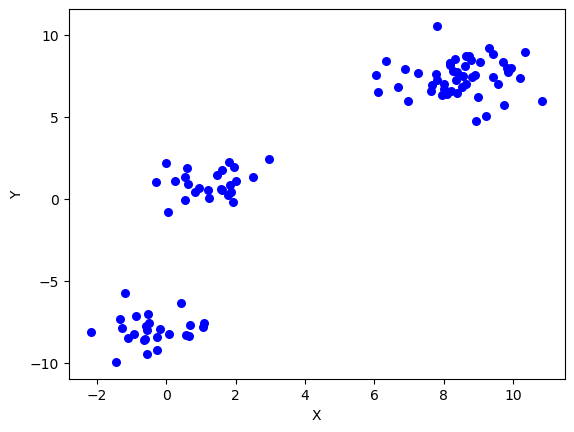

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
 
# make_blobs() generate sample points around c centers (randomly chosen)
X, y = make_blobs(n_samples = 100, centers = 4, 
                cluster_std = 1, n_features = 2)
                 
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b')
 
# label the axes
plt.xlabel('X')
plt.ylabel('Y')
 
plt.show()
plt.clf() # clear the figure

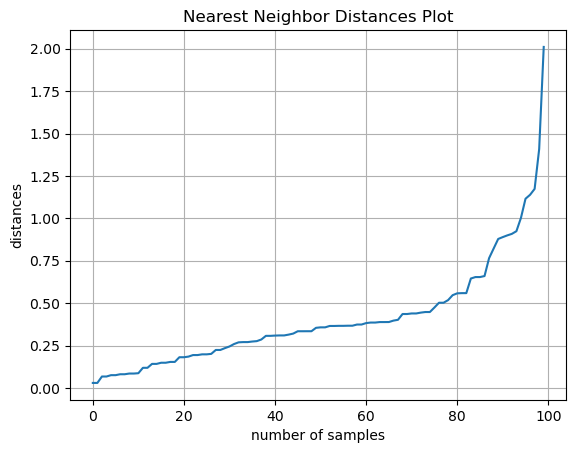

In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors= 3)

neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
plt.xlabel('number of samples')
plt.ylabel('distances')
plt.title('Nearest Neighbor Distances Plot')
plt.plot(distances[:,1])
plt.grid()

# Use DBSCAN to find clusters

Use initial estiamtes from KNN above (find elbow) to given initial trial for DBSCAN EPS values

In the plot above, there is a plateau in the y values somewherre near **1.9** or perhaps **2.6** (plateaus in the graph) indicating that a cluster distance (aka EPS) might work well somewhere near this value. We used this value in the batch_clustering_Streamlined.py file when computing DBSCAN.

EPS: Two points are neighbors if the distance between the two points is below a threshold. n: The minimum number of neighbors a given point should have in order to be classified as a core point. The point itself is included in the minimum number of samples.

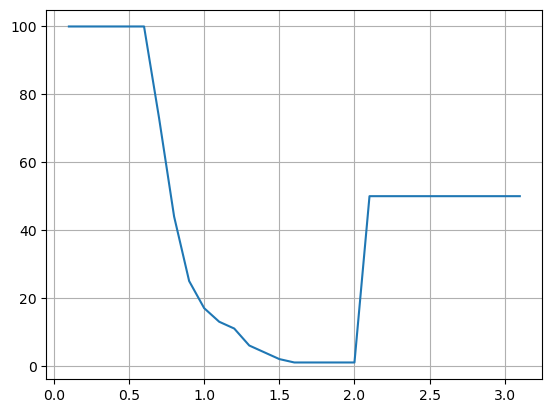

In [5]:
from sklearn.cluster import DBSCAN
 
n_samples = 10 # we'll say that you have to have at least 2 points in a set to call it a cluster

R = [i/10.0 for i in range(1,32)] # Range of EPS values to try
v = np.zeros([len(R), 2]) # empty array
idx = 0
plotData = np.zeros([len(R),2])
for eps in  R:
    db = DBSCAN(eps = eps, min_samples = n_samples).fit(X)
    counts = np.unique(db.labels_ , return_counts=True)
    plotData[idx,0] = eps
    plotData[idx,1] = counts[1][0]
    idx += 1
plt.plot(plotData[:,0], plotData[:,1])
plt.grid()

array([0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0])

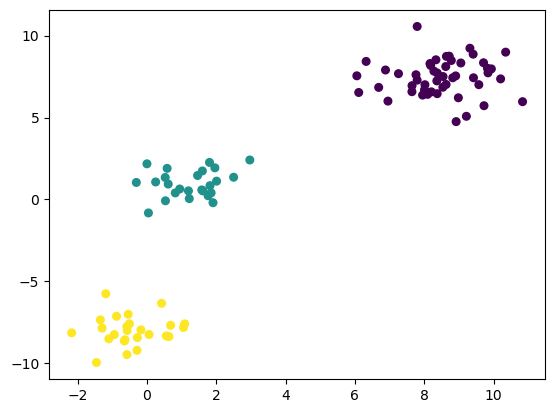

In [9]:

EPS = 1.9
EPS = 2.6
db = DBSCAN(eps=EPS, min_samples = n_samples).fit(X)
plt.scatter(X[:, 0], X[:, 1], s = 30, c =db.labels_)
db.labels_